In [1]:
import src.ewatercycle_wflowjl.forcing.forcing as forcing

cmip_dataset = {
    "dataset": "GFDL-ESM2G",
    "project": "CMIP5",
    "grid": "gr",
    "exp": ["historical",],
    "ensemble": "r1i1p1",
}

forcing = forcing.WflowJlForcing.generate(
    dataset=cmip_dataset,
    start_time="1990-01-01T00:00:00Z",
    end_time="1990-12-31T00:00:00Z",
    shape="/home/bart/Documents/wflow_humber/shp/humber_catchment.shp",
    dem_file="/home/bart/Documents/wflow_humber/staticmaps.nc",
)

hwloc/linux: Ignoring PCI device with non-16bit domain.
Pass --enable-32bits-pci-domain to configure to support such devices
(warning: it would break the library ABI, don't enable unless really needed).
/home/bart/micromamba/envs/ewatercycle/lib/python3.10/site-packages/esmvalcore/experimental/_warnings.py:13: UserWarning: 
  Thank you for trying out the new ESMValCore API.
  Note that this API is experimental and may be subject to change.
  More info: https://github.com/ESMValGroup/ESMValCore/issues/498
ESGF credentials missing, only data that is accessible without
logging in will be available.

See https://esgf.github.io/esgf-user-support/user_guide.html
for instructions on how to create an account if you do not have
one yet.

Next, configure your system so esmvaltool can use your
credentials. This can be done using the keyring package, or
you can just enter them in /home/bart/.esmvaltool/esgf-pyclient.yml.

keyring
First install the keyring package (requires a supported
backend, see

In [2]:
import xarray as xr
ds = xr.open_dataset(forcing.directory / forcing.netcdfinput)

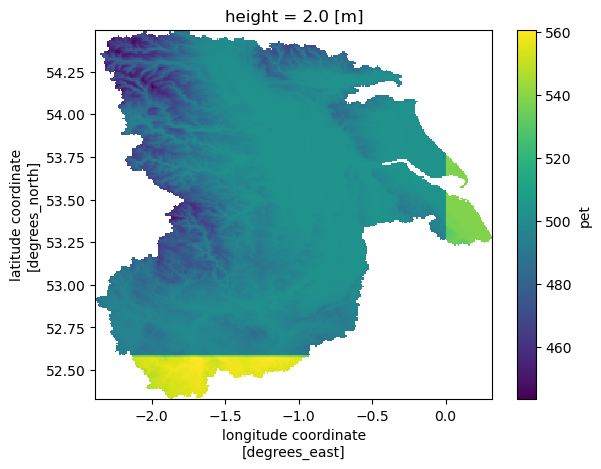

In [5]:
ds["pet"].sum(dim="time", skipna=False).plot()

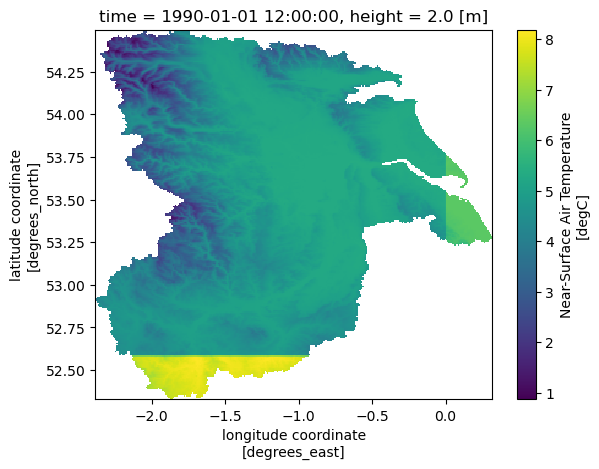

In [4]:
ds["temp"].isel(time=0).plot()